In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression

Preparing data for classification models!

In [2]:
cols = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height","Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
dataset = pd.read_excel("energy_efficient.xlsx", names=cols)
dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
threshold_heating = dataset["Heating Load"].median()
dataset["Heating Load"] = (dataset["Heating Load"] <= threshold_heating).astype(int)
threshold_cooling = dataset["Cooling Load"].median()
dataset["Cooling Load"] = (dataset["Cooling Load"] <= threshold_cooling).astype(int)

In [4]:
dataset_heating = dataset.iloc[:, :-1]
dataset_heating

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,1
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,1
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,1
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,1


In [5]:
dataset_cooling = dataset.iloc[:, :-1]
dataset_cooling

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,1
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,1
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,1
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,1


First label "Heating Load"!

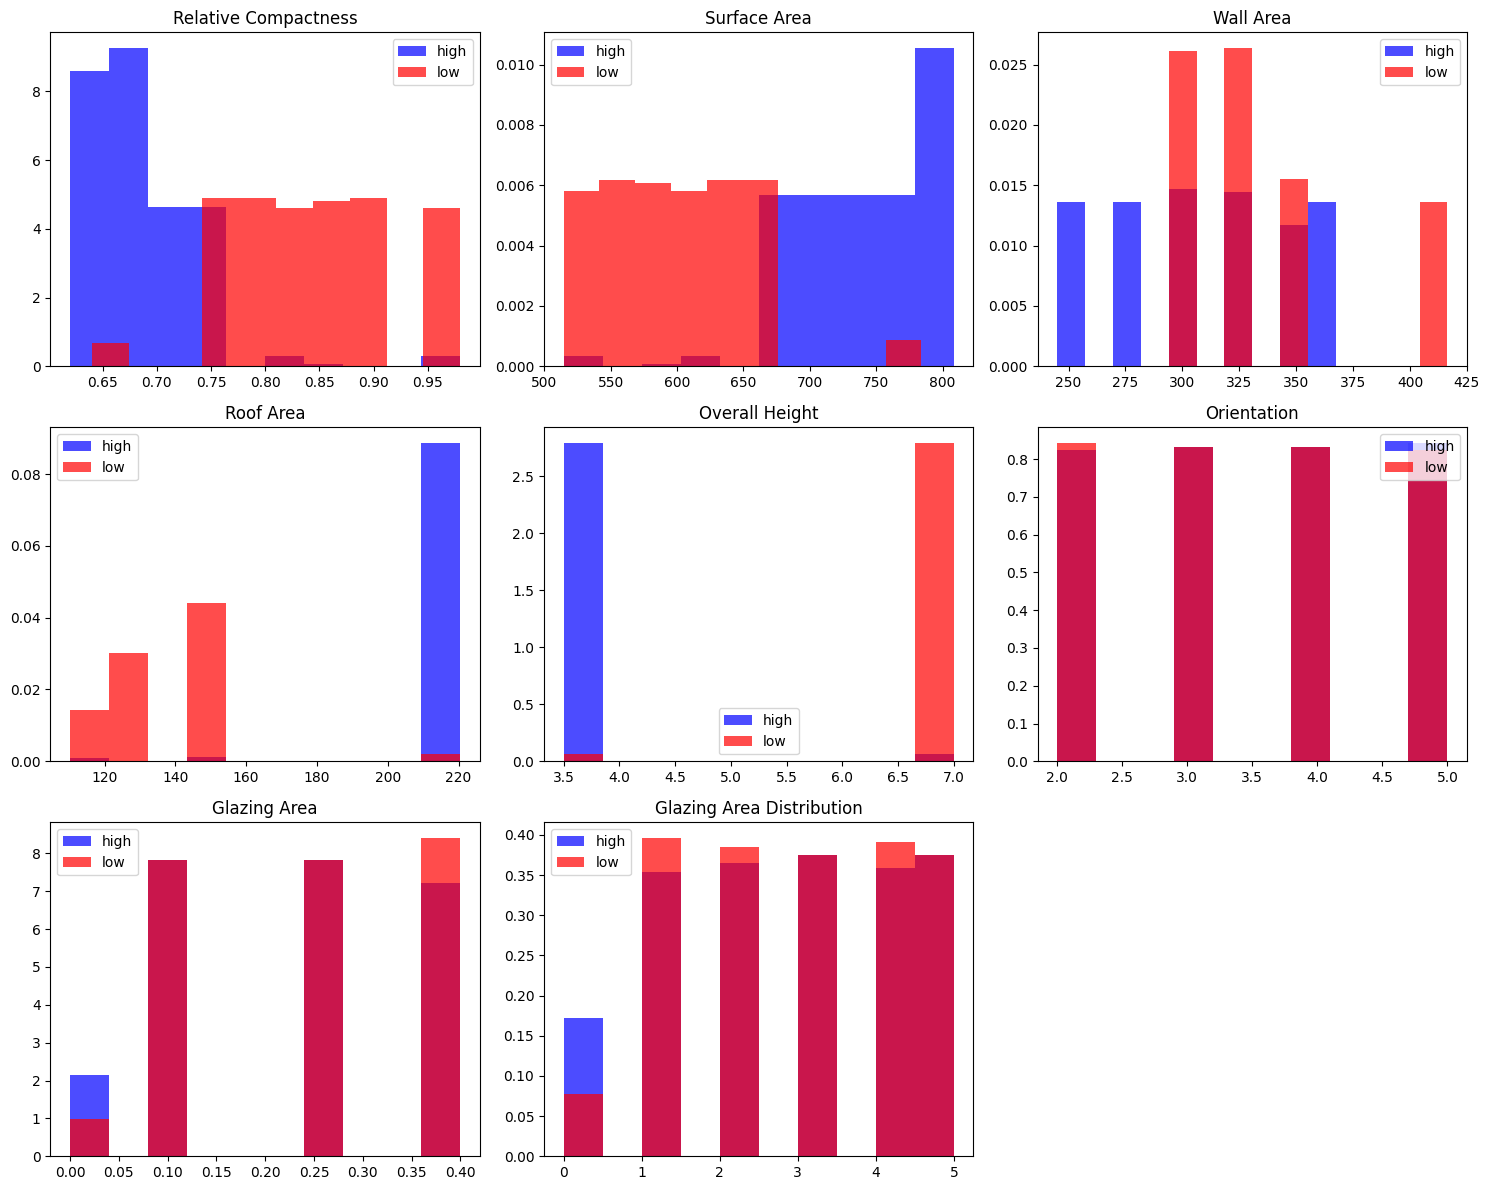

In [6]:
features  = cols[:-2]
fig, ax = plt.subplots(3,3, figsize=(15, 4 * 3))
ax = ax.flatten()

for i, label in enumerate(features):
    ax[i].hist(dataset_heating[dataset_heating["Heating Load"] == 1][label], 
                 color="blue", label="high", alpha=0.7, density=True)
    ax[i].hist(dataset_heating[dataset["Heating Load"] == 0][label], 
                 color="red", label="low", alpha=0.7, density=True)
    ax[i].set_title(label)
    ax[i].legend()

for j in range(i + 1, len(ax)):
    ax[j].axis("off")

plt.tight_layout()
plt.show()

In [7]:
train, test = train_test_split(dataset_heating, test_size=0.2,  random_state=42)

In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X_scale, y = ros.fit_resample(X_scale, y)

    data = np.hstack((X_scale , np.reshape(y, (-1, 1))))

    return data, X_scale , y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [10]:
len(X_train), len(X_test)

(626, 154)

Algorithm: Logistic Regression!

In [11]:
lg_model_heat = LogisticRegression()
lg_model_heat.fit(X_train, y_train)
y_pred_lg_heat = lg_model_heat.predict(X_test)
print(classification_report(y_test, y_pred_lg_heat))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98        83
           1       0.96      0.99      0.97        71

    accuracy                           0.97       154
   macro avg       0.97      0.97      0.97       154
weighted avg       0.97      0.97      0.97       154



Algorithm: K-Nearest Neighbors (KNN)!

In [12]:
knn_model_heat = KNeighborsClassifier(n_neighbors=5)
knn_model_heat.fit(X_train, y_train)
y_pred_knn_heat = knn_model_heat.predict(X_test)
print(classification_report(y_test, y_pred_knn_heat))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.97      0.99      0.98        71

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154



Algorithm: Naive Bayes (NB)!

In [13]:
nb_model_heat = GaussianNB()
nb_model_heat.fit(X_train, y_train)
y_pred_nb_heat = nb_model_heat.predict(X_test)
print(classification_report(y_test, y_pred_nb_heat))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.97      0.99      0.98        71

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154



Deep Learning with Pytorch!

In [45]:
X_train_nn= torch.from_numpy(X_train).type(torch.float32)
y_train_nn = torch.from_numpy(y_train).type(torch.float32)
X_test_nn= torch.from_numpy(X_test).type(torch.float32)
y_test_nn = torch.from_numpy(y_test).type(torch.float32)

In [46]:
model_nn = nn.Sequential(
    nn.Linear(in_features=8, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=1),
)

In [47]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_nn.parameters(), lr=0.01)

In [48]:
def accurancy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc 

In [49]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_nn.train()

    y_logits = model_nn(X_train_nn).squeeze()
    y_pred_nn = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train_nn)
    acc = accurancy_fn(y_true=y_train_nn, y_pred=y_pred_nn)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    model_nn.eval()
    with torch.inference_mode():
        test_logits = model_nn(X_test_nn).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test_nn)
        test_acc = accurancy_fn(y_true = y_test_nn, y_pred = test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc: 2f}")

Epoch: 0 | Loss: 0.69096, Acc: 52.40 | Test loss: 0.68824, Test acc:  59.090909
Epoch: 10 | Loss: 0.66466, Acc: 86.90 | Test loss: 0.66268, Test acc:  88.311688
Epoch: 20 | Loss: 0.63921, Acc: 94.57 | Test loss: 0.63778, Test acc:  94.155844
Epoch: 30 | Loss: 0.61395, Acc: 97.12 | Test loss: 0.61287, Test acc:  98.051948
Epoch: 40 | Loss: 0.58836, Acc: 97.44 | Test loss: 0.58757, Test acc:  98.051948
Epoch: 50 | Loss: 0.56217, Acc: 97.44 | Test loss: 0.56165, Test acc:  98.051948
Epoch: 60 | Loss: 0.53530, Acc: 97.44 | Test loss: 0.53498, Test acc:  98.051948
Epoch: 70 | Loss: 0.50775, Acc: 97.44 | Test loss: 0.50761, Test acc:  98.051948
Epoch: 80 | Loss: 0.47966, Acc: 97.44 | Test loss: 0.47974, Test acc:  98.051948
Epoch: 90 | Loss: 0.45135, Acc: 97.44 | Test loss: 0.45166, Test acc:  98.051948
Epoch: 100 | Loss: 0.42320, Acc: 97.44 | Test loss: 0.42373, Test acc:  98.051948
Epoch: 110 | Loss: 0.39559, Acc: 97.44 | Test loss: 0.39634, Test acc:  98.051948
Epoch: 120 | Loss: 0.36889,